# Module Title:	 Machine Learning for Business  
### Assessment Title:  MLBus_HDipData_CA1
### Lecturer Name:	 Dr. Muhammad Iqba  
### Student Full Name & Number:	Natalia de Oliveira Rodrigues 2023112 and Heitor Gomes de Araujo Filho 2023098

# List of Contents:

    1. Introduction
    2. Exploratory Data Analysis
    3. Data Visualization
    4. Time Series Analysis
    5. Cluster Analysis
    6. Conclusion
    7. References
    

# Introduction

<p>Accessible on Kaggle (https://www.kaggle.com/datasets/abeperez/historical-plane-crash-data), the "Historical Plane Crash Data" dataset provides a vast compilation of invaluable information regarding aircraft accidents that transpired over multiple decades. This dataset offers a unique insight into the aviation industry by recording aircraft mishaps, crashes, and incidents globally.</p>
<p>The "Historical Plane Crash Data" dataset is a comprehensive compilation of aviation accidents that occur between 1918 and 2022. Numerous important elements in this extensive dataset offer priceless insights into the field of aviation safety. The elements of the collection include crucial information including the precise date and time of each occurrence, aircraft specifications including make and model, operator information, crash site coordinates, and a detailed report of fatalities. A comprehensive picture of each incident is provided by the inclusion of details regarding flight phases, aircraft registrations, flight types, and the number of survivors. It also contains comprehensive details on the scene and circumstances of every crash, including information about the passengers and crew.</p>
<p>The data's wide range of features makes it an excellent fit for an extensive investigation. The purpose of this study is to conduct a thorough time series analysis of the historical data on plane crashes. Furthermore, we want to use clustering algorithms to find trends and groups of aviation occurrences across time. With the use of this diverse approach, aircraft accident causes and historical trends can be better understood.</p>
<p>Using the strength of time series analysis and clustering techniques, this study provides a crucial investigation into historical aviation data, revealing patterns and important information. The results and understandings obtained will make the aviation sector safer and better informed. Our goal is to significantly improve operational effectiveness and aviation safety through data-driven analysis.</p>

In [1]:
# Most commun libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
 
# Libraries for Preprocessing encoding
from sklearn.preprocessing import LabelEncoder

# Libraries for Preprocessing scaling
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler

# Libraries for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from pmdarima import auto_arima

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from tbats import TBATS
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa # can access various time series analysis functions, classes, and models for tasks such as time series forecasting, seasonality analysis, and autocorrelation analysis

# Libraries for model validation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Libraries for cluster analysis
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

#for defining models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#for model evaluation
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
# Load the dataset from Plane Crashes.csv and display head(2)
df = pd.read_csv('Plane Crashes.csv')

In [3]:
def glimpse(df):
    print(f'Observations: {df.shape[0]} rows \nAttributes: {df.shape[1]} columns')
    print("-" * 100)
    display(df.head())
    print("-" * 100)
    display(df.describe())
    print("-" * 100)
    display(f'Missing values: {df.isnull().sum()}')
    print("-" * 100)
    display(df.info())
    
    

data = glimpse(df)

Observations: 28536 rows 
Attributes: 24 columns
----------------------------------------------------------------------------------------------------


,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown


----------------------------------------------------------------------------------------------------


,YOM,Flight no.,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities
count,23225.000000,0.0,28512.000000,28535.000000,28482.000000,28535.000000,28526.000000,28536.000000
mean,1931.942519,NaN,3.052539,1.771649,7.705393,3.679727,0.109760,5.567389
std,285.486067,NaN,11.738151,2.520554,24.066368,15.288171,2.644296,16.713203
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1944.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1958.000000,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1974.000000,NaN,4.000000,3.000000,4.000000,1.000000,0.000000,5.000000
max,19567.000000,NaN,1924.000000,25.000000,509.000000,506.000000,297.000000,520.000000


----------------------------------------------------------------------------------------------------


'Missing values: Date                    0\nTime                14587\nAircraft                1\nOperator                0\nRegistration          815\nFlight phase          638\nFlight type            57\nSurvivors            1297\nCrash site            383\nSchedule             8946\nMSN                  4182\nYOM                  5311\nFlight no.          28536\nCrash location         12\nCountry                 1\nRegion                  1\nCrew on board          24\nCrew fatalities         1\nPax on board           54\nPAX fatalities          1\nOther fatalities       10\nTotal fatalities        0\nCircumstances          25\nCrash cause             0\ndtype: int64'

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28536 entries, 0 to 28535
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              28536 non-null  object 
 1   Time              13949 non-null  object 
 2   Aircraft          28535 non-null  object 
 3   Operator          28536 non-null  object 
 4   Registration      27721 non-null  object 
 5   Flight phase      27898 non-null  object 
 6   Flight type       28479 non-null  object 
 7   Survivors         27239 non-null  object 
 8   Crash site        28153 non-null  object 
 9   Schedule          19590 non-null  object 
 10  MSN               24354 non-null  object 
 11  YOM               23225 non-null  float64
 12  Flight no.        0 non-null      float64
 13  Crash location    28524 non-null  object 
 14  Country           28535 non-null 

None

# Data Preprocessing 

    To preprocess the raw data for immediate analysis and modeling the data was transformed, cleaned and prepared. The process involved tasks such as converting features to the correct data type, handling missing data, encoding categorical variables and ensuring that the data is ready for analysis.
    
    One of the aims of this project is to perform a time series analysis of the historical plane crash data. It means that the column Date and how it will be prepared has a huge influence on this project. The column Date was converted to a datetime format, sorted to ensure the crescent order, was set as an index, and the initial Date attribute was dropped.
    
    The investigation of numerical and categorical variables highlighted the necessity of preprocessing the data:

        1. Seven (7) categories were converted to numeric using Pandas. 
        
        2. The category Year of Manufacture  (YOM) presented invalid values that had to be dropped.
        
        3. The attribute Survivors, which is a binary category, was encoded using LabelEncoder() to transform Yes and No into ones (1) and zeros (0). 
        
        4. The attribute Flight phase was also encoded using LabelEncoder().  It appears that these flight phases have a logical order based on the unique variables present in the data. They are: 'Parking': 0,  'Taxiing': 1, 'Takeoff (climb)': 2, 'Landing (descent or approach)': 3, 'Flight': 4.
        
        5. To handle the missing data, three (3) columns were dropped due to the huge amount of missing data values. They are: ‘Flight no.’, ‘Time’, and ‘Schedule’.
        
        6. Entire columns also were dropped for presenting unique identifiers, which is not relevant for performing machine learning. They are: ‘MSN’, and ‘Registration’.
        
        7. To guarantee that our analysis will capture contemporary patterns, the dataset was filtered by date and the Past 50 years of data were selected. It also reduced the huge amount of missing data that was concentrated in the primary years of the data.
        
        8. The remaining rows containing missing values were dropped. The proprocessed dataset shape is 11,686 observations and 20 attributes.


In [4]:
# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Sort the dataset by the 'Date' column
df = df.sort_values(by='Date')

In [6]:
# Set the 'Date' column to index
df.index = df['Date']

# Drop the 'Date' column from the dataframe
#df.drop('Date', axis = 1, inplace = True)

### Data Preprocessing: Investigating numerical and categorical variables

In [7]:
columns_to_convert = ['YOM', 'Crew on board', 'Crew fatalities', 'Pax on board', 'PAX fatalities', 
                      'Other fatalities', 'Total fatalities']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce').astype('Int64')

In [8]:
# Invalid values column Year of manufacture
df.YOM.unique()

<IntegerArray>
[<NA>, 1918, 1919, 1920, 1921, 1923, 1922, 1924, 1925,    1,
 ...
 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2020, 2019]
Length: 145, dtype: Int64

In [9]:
# To create a filter valid_year where only values after 1900 and before 2022 will be kept
valid_years = (df['YOM'] >= 1900) & (df['YOM'] <= 2022)
df = df[valid_years]

### Data Preprocessing: Investigating categorical variables

In [10]:
df.describe(include = 'object').T

,count,unique,top,freq
Time,12271,1380,12H 0M 0S,344
Aircraft,22873,966,Douglas C-47 Skytrain (DC-3),1955
Operator,22874,8594,United States Air Force - USAF,1307
Registration,22827,22580,1,5
Flight phase,22392,5,Landing (descent or approach),8710
Flight type,22824,31,Scheduled Revenue Flight,5545
Survivors,22008,2,Yes,12836
Crash site,22589,6,Airport (less than 10 km from airport),11518
Schedule,16227,13900,Point Cook - Point Cook,22
MSN,22763,17572,01,46


In [11]:
# This investigate unique values of Region attribute
df.Region.unique()

array(['Europe', 'North America', 'Africa', 'World', 'Oceania', 'Asia',
       'South America', 'Central America', 'Antarctica'], dtype=object)

In [12]:
# This investigate how many observations where Region is World
df_region_check = df[df['Region'] == 'World']
print(f'There are {df_region_check.shape[0]} observations where Region is classified as World.')

There are 398 observations where Region is classified as World.


In [13]:
# This investigate unique values of Crash cause attribute
df['Crash cause'].unique()

array(['Technical failure', 'Unknown', 'Weather', 'Human factor',
       'Other causes', 'Terrorism act, Hijacking, Sabotage'], dtype=object)

In [14]:
# This investigate how many observations where Crash cause is Unknown
df_cause_check = df[df['Crash cause'] == 'Unknown']
print(f'There are {df_cause_check.shape[0]} observations where Crash cause is classified as Unknown.')

There are 6569 observations where Crash cause is classified as Unknown.


In [15]:
df['Flight type'].value_counts()

Scheduled Revenue Flight                       5545
Military                                       3104
Cargo                                          2591
Private                                        2179
Training                                       1793
Charter/Taxi (Non Scheduled Revenue Flight)    1737
Executive/Corporate/Business                   1007
Positioning                                     639
Survey / Patrol / Reconnaissance                465
Test                                            462
Spraying (Agricultural)                         457
Ferry                                           384
Postal (mail)                                   362
Supply                                          305
Government                                      211
Ambulance                                       209
Bombing                                         195
Illegal (smuggling)                             193
Delivery                                        166
Skydiving / 

### Data Preprocessing: Encoding categorical variables

In [16]:
df['Survivors'].unique()

array(['Yes', 'No', nan], dtype=object)

In [17]:
# Create a LabelEncoder object for Survivors attribute
label_encoder = LabelEncoder()

# Apply label encoding to the "Survivors" column
df['Survivors_encoded'] = label_encoder.fit_transform(df['Survivors'])

In [18]:
# Create a LabelEncoder object for Flight phase attribute  
df['Flight phase'].unique()

array(['Takeoff (climb)', 'Landing (descent or approach)', 'Flight', nan,
       'Taxiing', 'Parking'], dtype=object)

In [19]:
# Define a custom mapping of 'Flight phase' to numerical values
custom_mapping = {
    'Parking': 0,
    'Taxiing': 1,
    'Takeoff (climb)': 2,
    'Landing (descent or approach)': 3,
    'Flight': 4
}

# Map the 'Flight phase' column to the custom numerical values
df['Flight phase_encoded'] = df['Flight phase'].map(custom_mapping).astype('Int64')

### Data Preprocessing: Handling missing data

In [20]:
# Remove the attributes with high missing data values, and attributes without variance(unique identifiers) 
df = df.drop(columns=["Flight no.", "Time", 'MSN','Registration','Schedule'])

In [21]:
# Display the remain missing values, and dataset shape
print(f'The new dataset shape: {df.shape}')
df.isnull().sum().sort_values(ascending=False)

The new dataset shape: (22874, 21)


Survivors               866
Flight phase_encoded    482
Flight phase            482
Crash site              285
Flight type              50
Pax on board             29
Circumstances             9
Other fatalities          7
Crew on board             7
Crash location            5
Aircraft                  1
Crew fatalities           1
Survivors_encoded         0
Crash cause               0
Total fatalities          0
Date                      0
PAX fatalities            0
Country                   0
YOM                       0
Operator                  0
Region                    0
dtype: int64

In [22]:
# Select the last 50 years
df = df.loc['1972-05-01':'2022-05-31']

In [23]:
# Remove all rows with any missing values 
df.dropna(inplace=True) 

In [24]:
# Double check if missing values were removed sucessfully
print(f'The new dataset shape: {df.shape}')
df.isnull().sum()

The new dataset shape: (11600, 21)


Date                    0
Aircraft                0
Operator                0
Flight phase            0
Flight type             0
Survivors               0
Crash site              0
YOM                     0
Crash location          0
Country                 0
Region                  0
Crew on board           0
Crew fatalities         0
Pax on board            0
PAX fatalities          0
Other fatalities        0
Total fatalities        0
Circumstances           0
Crash cause             0
Survivors_encoded       0
Flight phase_encoded    0
dtype: int64

# Data Visualization

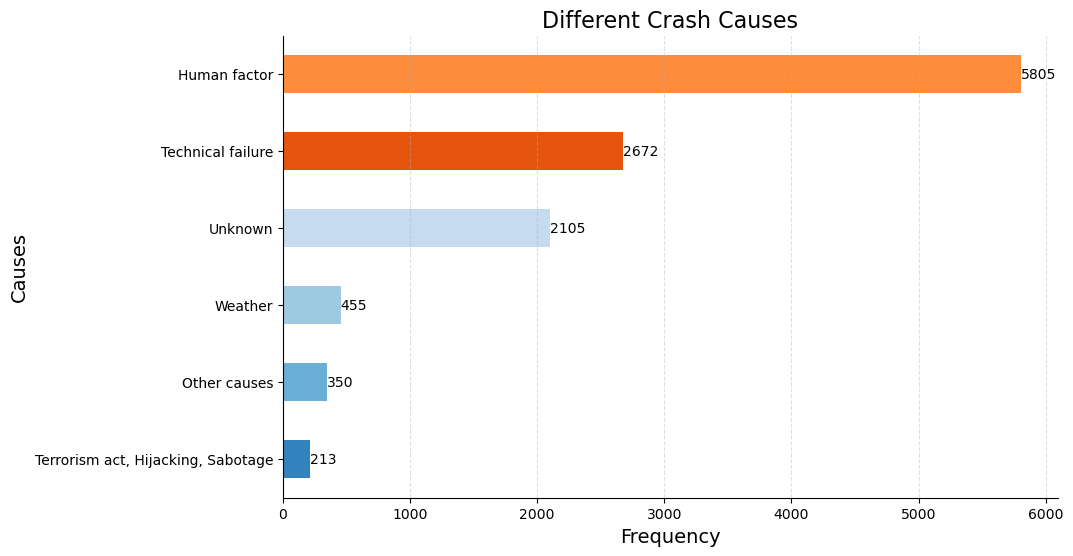

In [25]:
# Plot Different Crash Causes
viz_crash_causes = df['Crash cause'].value_counts()

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c(range(len(viz_crash_causes)))  

viz_crash_causes.sort_values().plot(kind='barh', color=colors)
plt.title('Different Crash Causes', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Causes', fontsize=14) 

for index, value in enumerate(viz_crash_causes.sort_values()):
    plt.text(value, index, str(value), ha='left', va='center')

sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()

The Different Crash Causes visualization shows 6 different crash causes. The Human factor is the TOP 1 crash cause according to the Plane Crashes dataset with 5847 crashes representing 49%, followed by Technical failure with 2690 crashes representing 22%. The top 3 are categorized by Unknown causes with 2114 representing almost 18% of the total crashes.

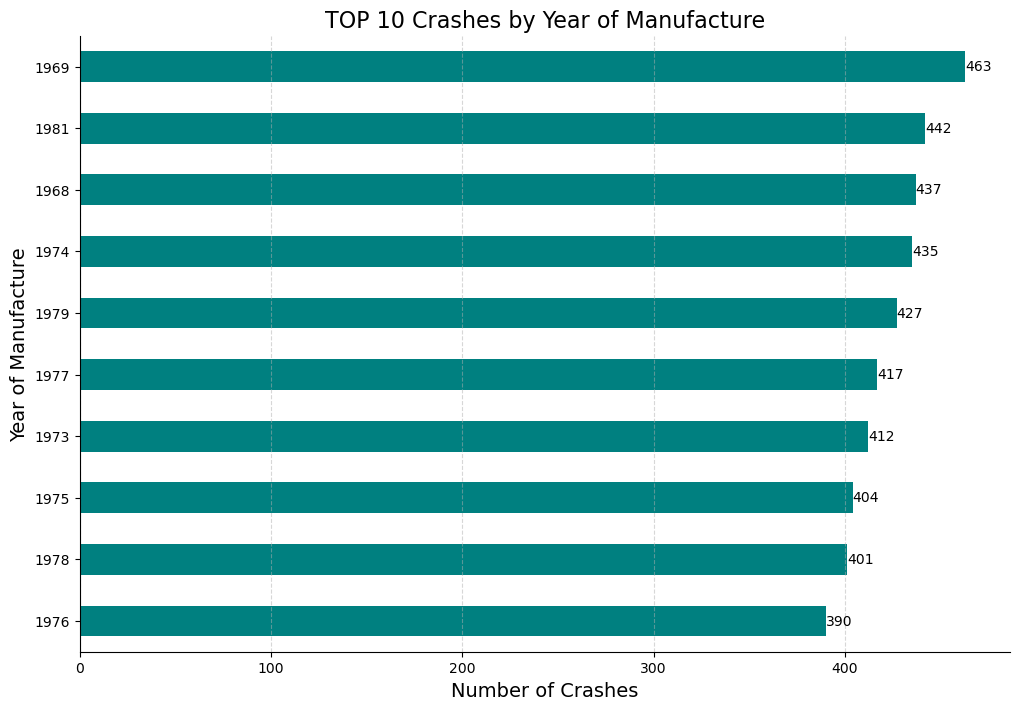

In [26]:
# YOM Vs Crashes causes viz
top_crash_years = df['YOM'].value_counts().head(10).sort_values()

plt.figure(figsize=(12, 8))
top_crash_years.plot(kind='barh', color='teal')
plt.title('TOP 10 Crashes by Year of Manufacture', fontsize=16)
plt.xlabel('Number of Crashes', fontsize=14)
plt.ylabel('Year of Manufacture', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)  

for index, value in enumerate(top_crash_years):
    plt.text(value, index, str(value), ha='left', va='center')
    
sns.despine()
plt.show()

It's observed that aeroplanes manufactured between 1969 and 1981 were the most frequent aeroplanes involved in plane crashes. They represent 35% of the crashes.

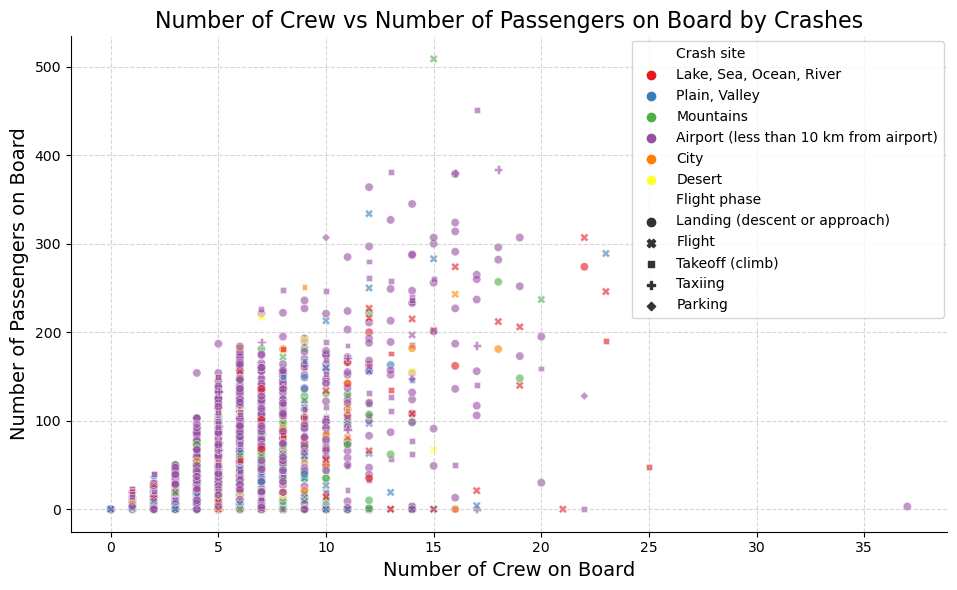

In [27]:
# Plot Number of Crew vs Number of Passengers on Board by Crashes
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='Crew on board', y='Pax on board', hue='Crash site', 
                style='Flight phase', palette='Set1',alpha=0.6)

plt.title('Number of Crew vs Number of Passengers on Board by Crashes', fontsize=16)
plt.xlabel('Number of Crew on Board', fontsize=14)
plt.ylabel('Number of Passengers on Board', fontsize=14)

sns.despine()
plt.legend(bbox_to_anchor=(0.64, 0.99), loc='upper left', borderaxespad=0.0)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()  
plt.show()


The scatterplot of the number of crew versus the number of passengers on board, as expected, shows a positive correlation between the variables. However, the most interesting on this visualization is the extra insights added by including the Crash site and Flight phase. The majority of the crash sites were less than 10km from airports during the flight phase Landing (descent or approach).

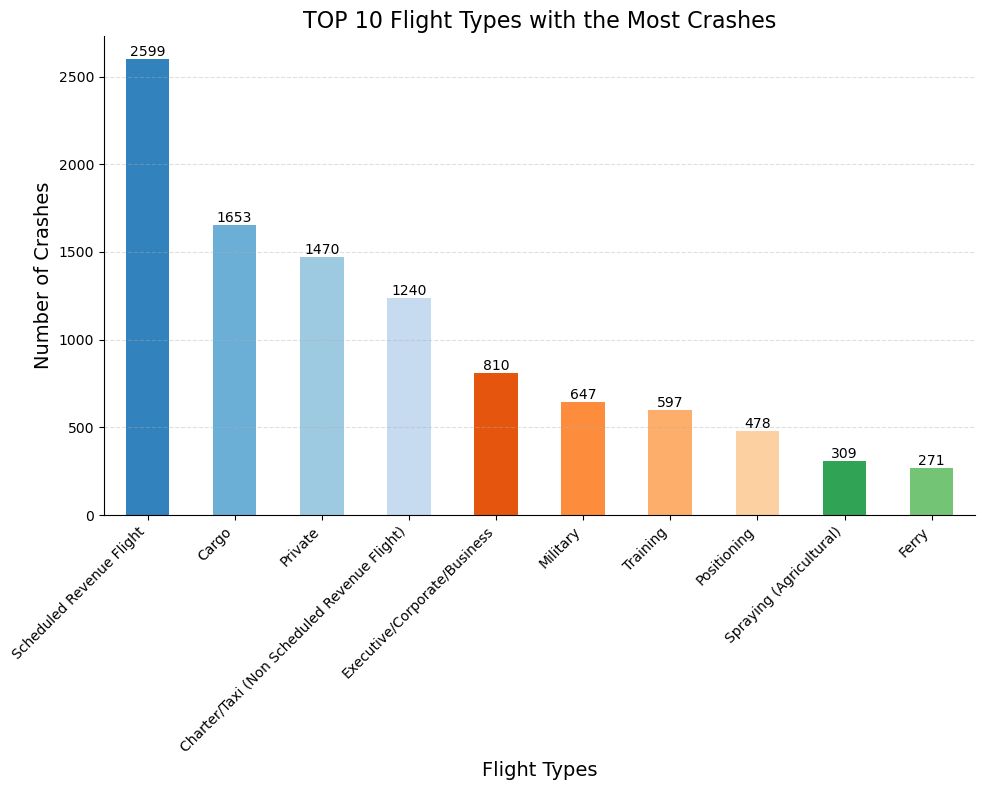

In [28]:
# Plot Top 10 Flight Types with Most Crashes
top_flight_types = df['Flight type'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 8))
colors = plt.cm.tab20c(range(len(top_flight_types)))  # Color variation for bars

top_flight_types.plot(kind='bar', color=colors)
plt.title('TOP 10 Flight Types with the Most Crashes', fontsize=16)
plt.xlabel('Flight Types', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)

for index, value in enumerate(top_flight_types):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(range(len(top_flight_types)), top_flight_types.index, rotation=45, ha='right', fontsize=10)  # Adjust label size and rotation
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


The TOP 10 Flight Types with the Most Crashes has Scheduled Revenue Flight in the first position. It represents 22% of crashes. They are found in commercial aviation, where passengers buy tickets or cargo space. The second position is occupied by cargo which represents 14%, followed by Private flights which represents 12%.

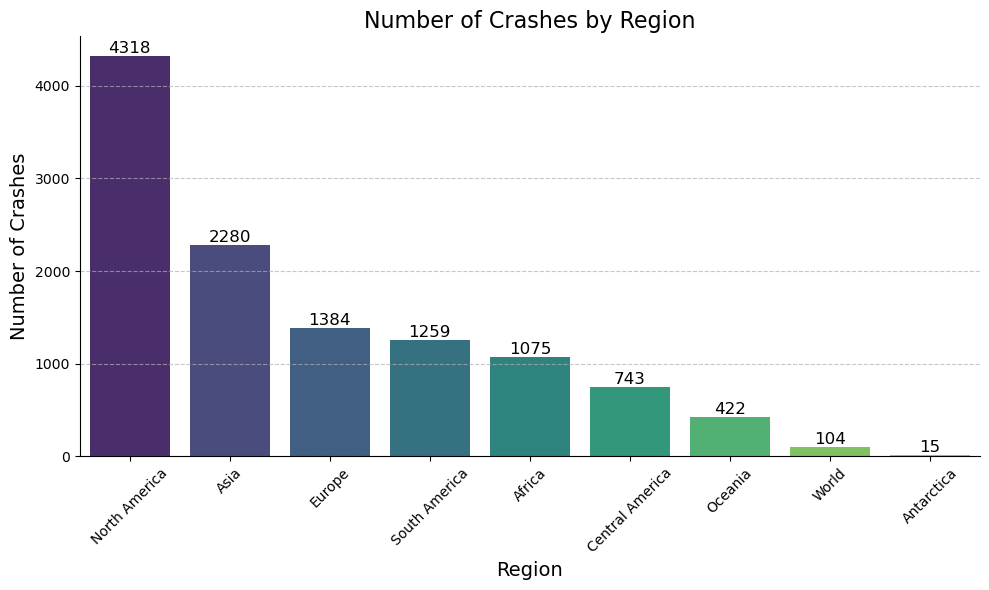

In [29]:
# Plot Number of Crashes by Region
crashes_by_region = df['Region'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=crashes_by_region.index, y=crashes_by_region, palette='viridis')
plt.title('Number of Crashes by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)


for index, value in enumerate(crashes_by_region):
    bar_plot.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

sns.despine()
plt.tight_layout()  
plt.show()


The Number of Crashes by Region shows us that 36% of the crashes happened in North America. The American continent is split into North, Central and South to provide more detailed information regarding incidents by region. Asia occupies the second rank with almost 20% of the crashes. Europe is in third place and represents 11% of the total crashes. North America occupies rank 4 representing 10% of the total crashes, followed by Africa 9%, Central America 6%, Oceania 3.5%, World less than 1%, and Antartica also less than 1%. The World category is a way to classify aviation incidents that do not belong to a specific continent or region.

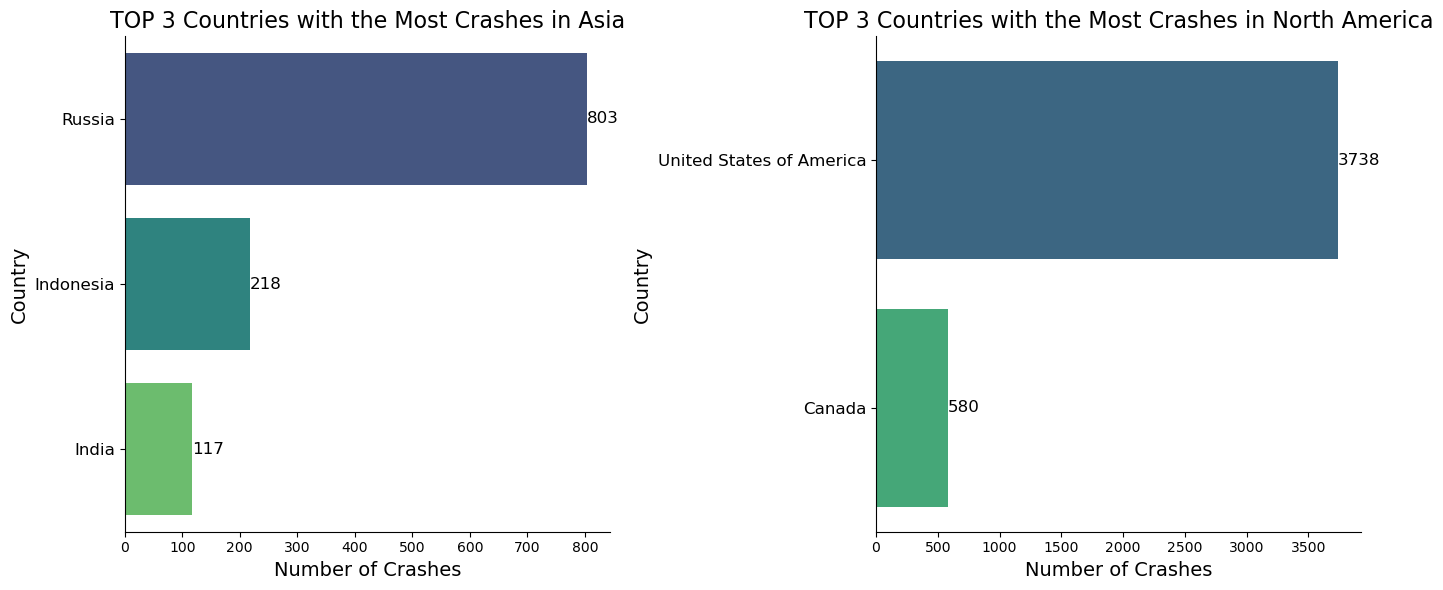

In [30]:
# Plot top 3 countries with the most crashes in the filtered regions
selected_regions = ['North America', 'Asia']
filtered_df = df[df['Region'].isin(selected_regions)]

top_countries_by_region = filtered_df.groupby('Region')['Country'].value_counts().groupby(level=0).nlargest(3).reset_index(level=0, drop=True)

plt.figure(figsize=(14, 6))

for region in top_countries_by_region.index.get_level_values(0).unique():
    top_countries = top_countries_by_region.xs(region)

    plt.subplot(1, 2, list(top_countries_by_region.index.get_level_values(0).unique()).index(region) + 1)
    bar_plot = sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
    plt.title(f'TOP 3 Countries with the Most Crashes in {region}', fontsize=16)
    plt.xlabel('Number of Crashes', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=12)

    for index, value in enumerate(top_countries.values):
        bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=12, color='black')

sns.despine()
plt.tight_layout()
plt.show()

The TOP 3 Countries with the Most Crashes in North America are the United States of America with 3767 crashes representing 31%, and Canada with 581 crashes representing 5% of the total crashes. In Asis, Russia with 809 crashes representing 7%, Indonesia 219 crashes representing 2% and India with 117 crashes representing less than 1% of the total crashes.

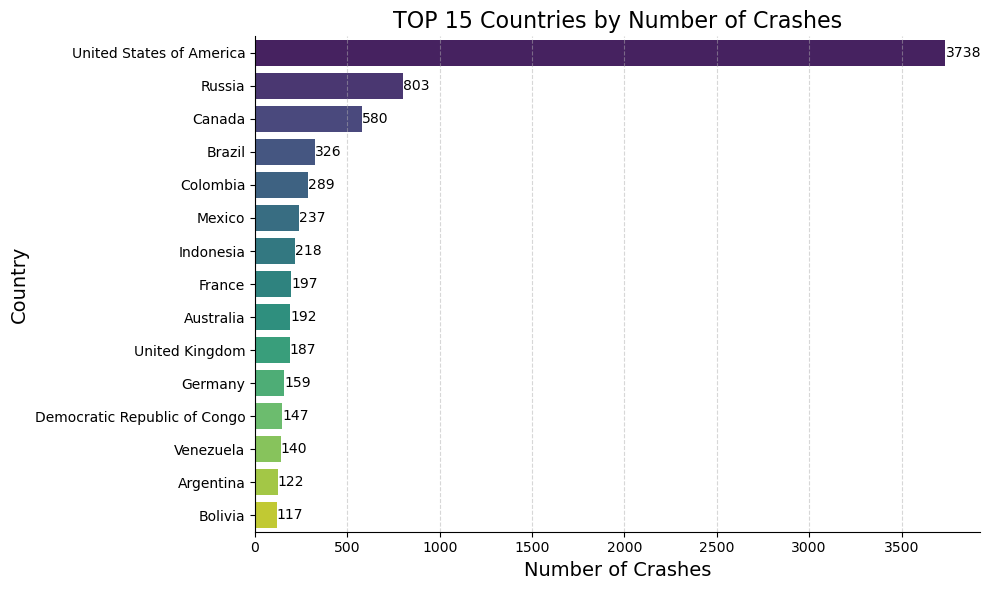

In [31]:
# Plot the top 15 countries by number of crashes 
top_countries = df['Country'].value_counts().head(15).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_countries, y=top_countries.index, palette='viridis', orient='h')
plt.title('TOP 15 Countries by Number of Crashes', fontsize=16)
plt.xlabel('Number of Crashes', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  

for index, value in enumerate(top_countries):
    bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()  
sns.despine()  
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines for reference

plt.show()


Given the Region information provided previously, as expected the TOP 15 countries are formed in your majority by countries of America and Asia continents.

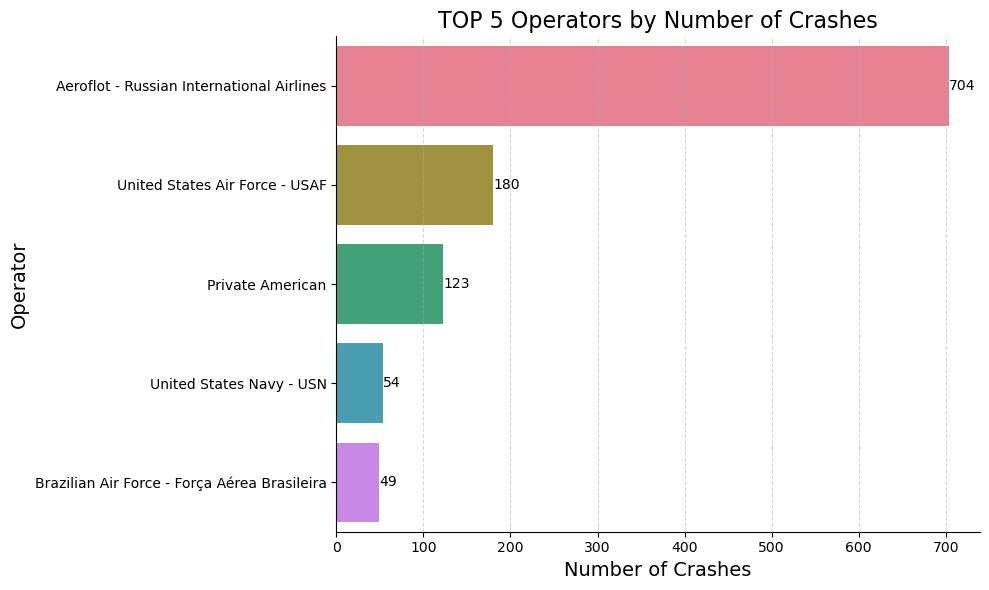

In [32]:
# Plot top 5 operators by number of crashes across all countries
top_operators = df['Operator'].value_counts().head(5).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_operators, y=top_operators.index, palette='husl', orient='h')  # Changed palette to 'coolwarm'
plt.title('TOP 5 Operators by Number of Crashes', fontsize=16)
plt.xlabel('Number of Crashes', fontsize=14)
plt.ylabel('Operator', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for index, value in enumerate(top_operators):
    bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

The TOP 5 Operators by Number of Crashes reveals that the Russian international airline Aeroflot is the TOP 1 in total of crashes by Operator. 

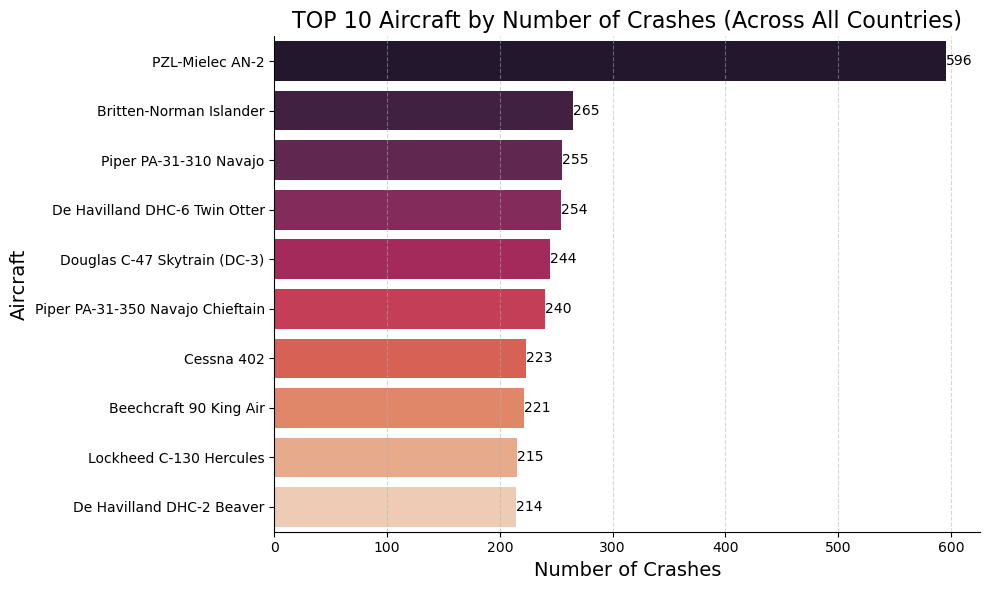

In [33]:
# Plot the top 10 aircraft with the most crashes
top_aircraft = df['Aircraft'].value_counts().head(10).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_aircraft, y=top_aircraft.index, palette='rocket', orient='h')  
plt.title('TOP 10 Aircraft by Number of Crashes (Across All Countries)', fontsize=16)
plt.xlabel('Number of Crashes', fontsize=14)
plt.ylabel('Aircraft', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for index, value in enumerate(top_aircraft):
    bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
sns.despine()
plt.grid(axis='x', linestyle='--', alpha=0.5)  

plt.show()


The TOP 10 Aircraft by Number of Crashes shows that 5% of the total crashes involved an aircraft called PZL-Mielec AN-2. 

# Time Series Analysis

The main goal of this Time Series Analysis is to analyse how the frequency of plane crashes has evolved over the past 50 years. And check if there are any long-term trends or seasonal patterns in crash occurrences. 

To develop a time series analysis using the historical plane crash data the analysis was divided into the following steps:
    
        1.	The attribute date plays a big part in this analysis. So, it was essential to convert it into a datetime data type, order it in crescent order, and transform the column on the data index. It was done during loading the dataset. 
        2.	Transform the dataset into a time series using resample(‘M’). It allows us to count the number of incidents by month. Posteriorly, the array was transformed into a dataframe called ts_df. The frame has 601 rows and 1 attribute. Out dataframe contains plane crash data from May 1972 up to May 2022.
        3.	The next step was displayed the time series. It is possible to observe a negative trend over the years. It highlighted the necessity of investigating if our data is stationary or not. 

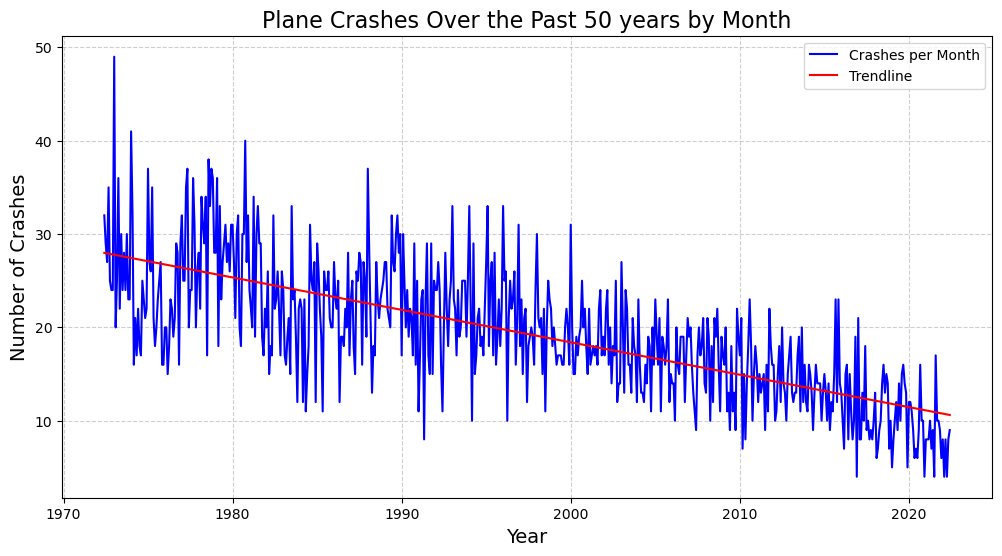

In [34]:
# Group data by month and count the number of crashes in each month
ts_df = df.resample('M').size()

# Create a time series plot
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(x=ts_df.index, y=ts_df.values, label='Crashes per Month', color='b')

# Add a trendline (linear regression)
from sklearn.linear_model import LinearRegression
X = np.arange(len(ts_df)).reshape(-1, 1)
y = ts_df.values
reg = LinearRegression().fit(X, y)
trendline = reg.predict(X)
plt.plot(ts_df.index, trendline, linestyle='-', label='Trendline', color='r')

plt.title('Plane Crashes Over the Past 50 years by Month',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of Crashes',fontsize=14)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Provide a clear legend
plt.legend()

plt.show()

        4.	When the time series is displayed by month, it is possible to observe the positive trend from April to August and a peak in December. It indicates the presence of certain seasonal patterns within the data. 

In [35]:
month_ts_df = ts_df.copy()
month_ts_df['month'] = ts_df.index.month
month_ts_df

Date
1972-05-31 00:00:00                                                   32
1972-06-30 00:00:00                                                   29
1972-07-31 00:00:00                                                   27
1972-08-31 00:00:00                                                   35
1972-09-30 00:00:00                                                   25
                                             ...                        
2022-02-28 00:00:00                                                    8
2022-03-31 00:00:00                                                    4
2022-04-30 00:00:00                                                    8
2022-05-31 00:00:00                                                    9
month                  Int64Index([ 5,  6,  7,  8,  9, 10, 11, 12,  1...
Length: 602, dtype: object

ValueError: Could not interpret value `crashes` for parameter `y`

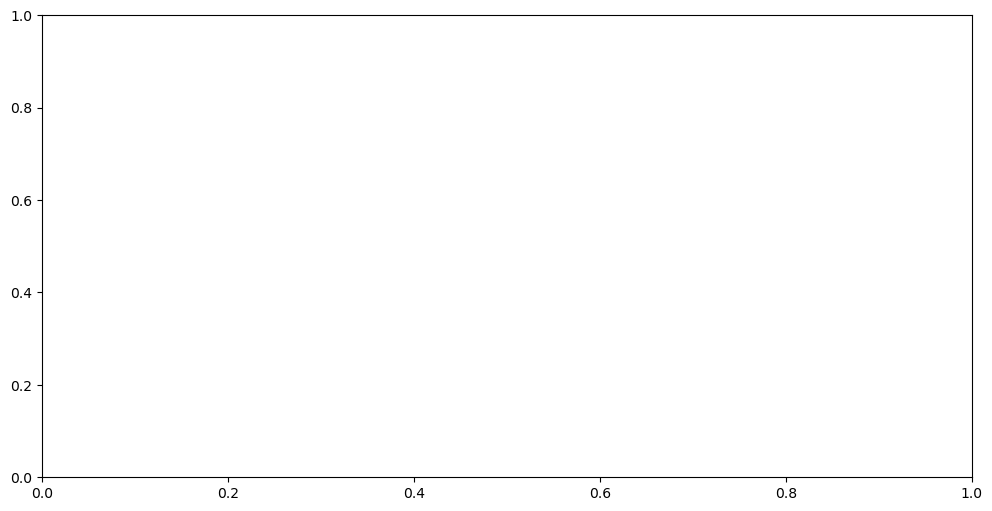

In [36]:
# Plot monthly pattern
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=month_ts_df, x='month', y='crashes', marker='o', ax=ax)
ax.set_title('Monthly Patterns of Crashes',fontsize=16)
ax.set_xlabel('Month of the Year',fontsize=14)
ax.set_ylabel('Number of Crashes',fontsize=14)

ax.set_xticks(range(1, 13))  
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax.grid(True, alpha=0.4)
plt.show()

## Decomposing the Time Series
        5.	To get more insights regarding our data, we need to decompose the data. Visualizing the decomposing of the time series, it is possible to see that data has a negative trend and seasonal pattern.

In [ ]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(ts_df, model='multiplicative') #additive 

# Create a 3x1 grid of subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot the trend component
axes[0].plot(decomposition.trend, color='darkgreen')
axes[0].set_title('Trend Component',fontsize=16)
axes[0].set_ylabel('Crashes',fontsize=14)

# Plot the seasonal component
axes[1].plot(decomposition.seasonal, color='g')
axes[1].set_title('Seasonal Component',fontsize=16)
axes[1].set_ylabel('Crashes',fontsize=14)

# Plot the residual component
axes[2].plot(decomposition.resid, color='lightgreen')
axes[2].set_title('Residual Component',fontsize=16)
axes[2].set_ylabel('Crashes',fontsize=14)

# Customize axis labels
axes[2].set_xlabel('Year',fontsize=14)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


        6.	The Dicky Fuller Test help us to identify that our data is non-stationary, because the test result shows a p-value > 0.05. The First Order Difference was applied to transform the non-stationary data into stationary. After differencing, the p-value < 0.05, and the data is stationary. We can reject the null hypothesis! It is possible to see that the data is stationary. The new p-value is below 0.05.  See below:

## Dicky Fuller Test

In [ ]:
# Check shape of data after resampling using monthly frequency
ts_df.shape

In [ ]:
# Convert array to dataframe using pandas
ts_df = pd.DataFrame(ts_df)

In [ ]:
# Set up index and column names
ts_df.index.name='date'
ts_df.columns=['crashes']
ts_df

In [ ]:
# Augmented Dickey-Fuller test
ADF_result = adfuller(ts_df['crashes'])

# Display the results
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

## Differencing

In [ ]:
# First-order difference (period=1)
diff = ts_df['crashes'].diff()
ts_df_diff = pd.DataFrame(diff)
ts_df_diff = ts_df_diff.dropna()

In [ ]:
# Augmented Dickey-Fuller test after differencing time series
ADF_result_first_order_diff = adfuller((diff.dropna()), autolag='AIC')
print("ADF Statistic and p-value for the original series:")
print("ADF Statistic:", ADF_result[0])
print("p-value:", ADF_result[1])

print("\nADF Statistic and p-value for the first-order differenced series:")
print("ADF Statistic:", ADF_result_first_order_diff[0])
print("p-value:", ADF_result_first_order_diff[1])

In [ ]:
# Plot before and after differencing time series
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot crashes
ts_df['crashes'].plot(ax=axes[0], color='b')
axes[0].set_title('Crashes',fontsize=16)
axes[0].set_ylabel('Count',fontsize=14)  # Set the label for the y-axis of the first plot
axes[0].grid(True)  # Add a grid for better readability

# Plot first-order differences of crashes
ts_df_diff.plot(ax=axes[1], color='lightblue')
axes[1].set_title('First-order differences of Crashes',fontsize=16)
axes[1].set_ylabel('Differences',fontsize=14)  # Set the label for the y-axis of the second plot
axes[1].grid(True)  # Add a grid for better readability

# Set a common label for the x-axis
plt.xlabel('Date',fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Autocorrelation ACF and PACF 

        7.	Before building our time series model, two more analyses were performed. Auto-correlation (ACF) and partial auto-correlation (PACF) plots are constructed from the differenced series using the statsmodels module. While PACF determines the residuals' connection with the subsequent lag value, ACF describes how well the series' present value is related to its prior values. In the figures below, it is possible to observe the difference between ACF and PACF before and after differencing. The visualization shows us that ACF has only one spike while PACF has more than one significant spike. It suggests an Autoregressive (AR) process. 

In [ ]:
# Plot ACF of 'crashes' column on a Matplotlib figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with two subplots

# Plot ACF on the first subplot
plot_acf(ts_df['crashes'], lags=50, ax=ax[0])
ax[0].set_title('ACF before differencing',fontsize=14)

# Plot PACF on the first subplot
plot_pacf(ts_df['crashes'], lags=50, ax=ax[1])
ax[1].set_title('PACF before differencing',fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# Plot ACF of 'crashes' column on a Matplotlib figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with two subplots

# Plot ACF on the first subplot
plot_acf(ts_df_diff['crashes'], lags=50, ax=ax[0])
ax[0].set_title('ACF after differencing',fontsize=14)

# Plot PACF on the second subplot
plot_pacf(ts_df_diff['crashes'], lags=50, ax=ax[1])
ax[1].set_title('PACF after differencing',fontsize=14)

plt.tight_layout()
plt.show()

## Split the data into training and testing sets

In [ ]:
ts_df.shape

In [ ]:
# Divide into train and validation set to calculate mean absolute percentage error 
months = -24
train_data = ts_df[:months]
test_data  = ts_df[months:]

train_data.shape, test_data.shape

In [ ]:
# Method to calculate the predicted percentage of the dataframe
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Display training and testing sets
plt.figure(figsize=(12, 6))
train_data['crashes'].plot(label='Training Set', color='darkblue')
test_data['crashes'].plot(label='Testing Set', color='red')
plt.axvline(x=train_data.index[-1], color='black', linestyle='--', label='Train/Test Split')

plt.title('Training and Testing Sets', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Crashes', fontsize=14)
plt.legend()
plt.show()

## Build the Time Series Models

## Baseline Model
        8.	This project uses Baseline Models as a reference point for more complex models. The Baseline models were applied and the results can be observed in the figure below. The MAPE results show that the naive forecast model outperforms the other baseline models in terms of accuracy. A naive forecast with a relatively low MAPE could indicate the existence of seasonality or a pattern in the data that the naive technique successfully detects. To determine whether seasonality is present and whether the crude forecast accounts for it, a more thorough investigation is necessary.

In [ ]:
baseline_df = ts_df.reset_index()
baseline_df.head()

In [ ]:
# Divide into train and validation set to calculate mean absolute percentage error 
months = -12
baseline_train_data = baseline_df[:months]
baseline_test_data  = baseline_df[months:]

train_data.shape, test_data.shape

### Predict historical mean

In [ ]:
# Calculate the average of the training data
historical_mean = np.mean(baseline_train_data['crashes'])

# Display the mean value of the training data
print(f'The historical mean: {historical_mean}')

# Add a new column named as 'pred_mean' into test dataframe
baseline_test_data.loc[:, 'pred_mean'] = historical_mean

# Display the test dataframe
baseline_test_data.head()

In [ ]:
y_true = baseline_test_data['crashes']
y_pred = historical_mean

# Calculate the value based on the orignal and predicted data values
mape_hist_mean = round(mape(y_true, y_pred),0)

# Display the mean data values
mape_hist_mean

In [ ]:
# Display the train and testing parts
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(baseline_train_data['date'], baseline_train_data['crashes'], 'g-.', label = 'Train')
ax.plot(baseline_test_data['date'], baseline_test_data['crashes'], 'b-', label = 'Test')
ax.plot(baseline_test_data['date'], baseline_test_data['pred_mean'], 'r--', label = 'Predicted')
ax.set_title('Baseline Model: Predict historical mean')
ax.set_xticks([])
ax.set_yticks([])
ax.legend(loc = 1)

plt.tight_layout()

### Predict last year mean 

In [ ]:
# Predict the last year mean values
last_year_mean = np.mean(baseline_train_data['crashes'])

# Last year mean values
last_year_mean

# Add a new column to the last year mean value
baseline_test_data.loc[:, 'pred__last_yr_mean'] = last_year_mean

baseline_test_data.head()

In [ ]:
y_true = baseline_test_data['crashes']
y_pred = last_year_mean

# Calculate the value based on the orignal and predicted data values
mape_last_year_mean = round(mape(y_true, y_pred),0)

# Display the mean data values
mape_last_year_mean

In [ ]:
# Display the train and testing parts
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(baseline_train_data['date'], baseline_train_data['crashes'], 'g-.', label = 'Train')
ax.plot(baseline_test_data['date'], baseline_test_data['crashes'], 'b-', label = 'Test')
ax.plot(baseline_test_data['date'], baseline_test_data['pred__last_yr_mean'], 'r--', label = 'Predicted')
ax.set_title('Baseline Model: Predict last year mean')
ax.set_xticks([])
ax.set_yticks([])
ax.legend(loc = 1)

plt.tight_layout()

### Predict last know value

In [ ]:
last = baseline_train_data['crashes'].iloc[-1]
baseline_test_data.loc[:, 'pred_last'] = last

baseline_test_data.head()

In [ ]:
y_true = baseline_test_data['crashes']
y_pred = last

# Calculate the value based on the orignal and predicted data values
mape_last = round(mape(y_true, y_pred),0)

# Display the mean data values
mape_last

In [ ]:
# Display the train and testing parts
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(baseline_train_data['date'], baseline_train_data['crashes'], 'g-.', label = 'Train')
ax.plot(baseline_test_data['date'], baseline_test_data['crashes'], 'b-', label = 'Test')
ax.plot(baseline_test_data['date'], baseline_test_data['pred_last'], 'r--', label = 'Predicted')
ax.set_title('Baseline Model: Predict last know value')
ax.set_xticks([])
ax.set_yticks([])
ax.legend(loc = 1)

plt.tight_layout()

### Naive seasonal forecast

In [ ]:
naive = baseline_train_data['crashes'][months:].values
baseline_test_data.loc[:, 'pred_last_season'] = naive

baseline_test_data.head()

In [ ]:
y_true = baseline_test_data['crashes']
y_pred = naive

# Calculate the value based on the orignal and predicted data values
mape_naive = round(mape(y_true, y_pred),0)

# Display the mean data values
mape_naive

In [ ]:
# Display the train and testing parts
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(baseline_train_data['date'], baseline_train_data['crashes'], 'g-.', label = 'Train')
ax.plot(baseline_test_data['date'], baseline_test_data['crashes'], 'b-', label = 'Test')
ax.plot(baseline_test_data['date'], baseline_test_data['pred_last_season'], 'r--', label = 'Predicted')
ax.set_title('Baseline Model: Naive Seasonal Forecast')
ax.set_xticks([])
ax.set_yticks([])
ax.legend(loc = 1)

plt.tight_layout()

# Complex Models
       9.	More complex models were built to find a better fit between the predicted values and actual values. The following models were built: ARIMA, SARIMA, SARIMAX, and TBATS. The Models were built, a nested loop that finds the best hyperparameters calculated the ACI values, and also some models were tunning using  auto_arima, which improved their MAPE results. 

## ARIMA Model

In [ ]:
# Create a new dataframe to build the ARIMA model
arima_df = ts_df.copy()
arima_df.head()

In [ ]:
arima_df.shape

In [ ]:
# Divide into train and validation set to calculate mean absolute percentage error 
months = -24
arima_train_data = arima_df[:months]
arima_test_data  = arima_df[months:]

arima_train_data.shape, arima_test_data.shape

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA model 
model = ARIMA(arima_train_data['crashes'], order=(1, 1, 1))
results = model.fit()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(arima_df['crashes'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

In [ ]:
smallest_last_value_list = min(aicVal, key=lambda x: x[-1])
smallest_last_value_list

In [ ]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_model = ARIMA(arima_train_data['crashes'], order=(0, 1, 1))
results = arima_model.fit()

# Forecasting 24 steps (2 years)
arima_predictions = results.forecast(steps=24)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
arima_train_data['crashes'].plot(ax=ax, label='Train Data', color='green')
arima_test_data['crashes'].plot(ax=ax, label='Test Data', color='blue')
arima_predictions.plot(ax=ax, label='Predictions', color='red')

plt.title('ARIMA MODEL (0, 1, 1)',fontsize=16)
plt.ylabel('Crashes', size=14)
plt.xlabel('Year', size=14)
plt.legend(loc='upper right', prop={'size': 10})
plt.grid(True)
plt.show()

In [ ]:
#MAPE 
mape_arima = mape(arima_test_data['crashes'], arima_predictions)
mape_arima

# SARIMAX Model

In [ ]:
sarimax_df = ts_df.copy()
sarimax_df.head()

In [ ]:
# Funtion to create new attributes based on index
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df

# Call the function
sarimax_df = create_features(sarimax_df)
sarimax_df 

In [ ]:
# Divide into train and validation set to calculate mean absolute percentage error 
months = -24
sarimax_train_data = sarimax_df[:months]
sarimax_test_data  = sarimax_df[months:]

train_data.shape, test_data.shape

In [ ]:
#SARIMAX exogenous variables
sarimax_train_exog = sarimax_train_data.iloc[:,1:]
sarimax_test_exog = sarimax_test_data.iloc[:,1:]
sarimax_test_exog.head()

In [ ]:
#Forecasting model
model = auto_arima(y = sarimax_train_data['crashes'],
                   X = sarimax_train_exog,
                   m = 12,
                   seasonal = True,
                   stepwise = False)

In [ ]:
# Forecasting 24 steps (2 years)
sarimax_predictions = model.predict(n_periods=len(sarimax_test_data), X=sarimax_test_exog)

#MAPE function
mape_sarimax = mape(sarimax_test_data['crashes'], sarimax_predictions)
mape_sarimax

In [ ]:
# Tunnning the model
model = auto_arima(y=sarimax_train_data['crashes'], exogenous=sarimax_train_exog,
                   m=12, seasonal=True, stepwise=False,
                   start_p=1, start_q=1, max_p=3, max_q=3,
                   start_P=1, start_Q=1, max_P=3, max_Q=3,
                   max_order=5, information_criterion='aic', trend='ct',
                   error_action='ignore', suppress_warnings=True, 
                   trace=True)

# Get the summary of the best model
print(model.summary())

In [ ]:

# Forecasting 24 steps (2 years)
sarimax_predictions = model.predict(n_periods=len(sarimax_test_data), X=sarimax_test_exog)

#MAPE function
mape_sarimax = mape(sarimax_test_data['crashes'], sarimax_predictions)
mape_sarimax


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming your entire dataset is 'full_data'
# Fitting the ARIMA model with the best parameters obtained
best_model = SARIMAX(sarimax_train_data['crashes'], order=(0, 1, 1), seasonal_order=(2, 0, 0, 12), trend='c')
results = best_model.fit()


forecast = results.get_forecast(steps=24)

# Get the predicted values
sarimax_predictions = forecast.predicted_mean

In [ ]:
# Forecasting 24 steps (2 years)
sarimax_predictions = model.predict(n_periods=len(sarimax_test_data), X=sarimax_test_exog)

fig, ax = plt.subplots(figsize=(14, 6))
sarimax_train_data['crashes'].plot(ax=ax, label='Train Data', color='green')
sarimax_test_data['crashes'].plot(ax=ax, label='Test Data', color='blue')
sarimax_predictions.plot(ax=ax, label='Predictions', color='red')

plt.title('SARIMAX MODEL(0, 1, 1, 12)',fontsize=16)
plt.ylabel('Crashes', size=14)
plt.xlabel('Year', size=14)
plt.legend(loc='upper right', prop={'size': 10})
plt.grid(True)
plt.show()

In [ ]:
#MAPE function
mape_sarimax = mape(sarimax_test_data['crashes'], sarimax_predictions)
mape_sarimax

## SARIMA Model

In [ ]:
sarima_df = ts_df.copy()
sarima_df.head()

In [ ]:
# Divide into train and validation set to calculate mean absolute percentage error 
months = -24
sarima_train_data = sarima_df[:months]
sarima_test_data  = sarima_df[months:]

sarima_train_data.shape, sarima_test_data.shape

In [ ]:
auto_model = auto_arima(sarima_df, start_p=1, start_q=1,
                        max_p=3, max_q=3, m=12,
                        start_P=0, seasonal=True,
                        d=1, D=1, trace=True,
                        error_action='ignore',  # to ignore warnings
                        suppress_warnings=True,  # to suppress convergence warnings
                        stepwise=True)

In [ ]:
# Create and fit the SARIMAX model
sarima_model = SARIMAX(sarima_train_data, order=(0, 1, 1), seasonal_order=(2, 1, 0, 12))
results = sarima_model.fit()

# Forecasting 24 steps (2 years)
sarima_forecast = results.get_forecast(steps=24)
sarima_predictions = sarima_forecast.predicted_mean

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sarima_train_data['crashes'].plot(ax=ax, label='Train Data', color='green')
sarima_test_data['crashes'].plot(ax=ax, label='Test Data', color='blue')
sarima_forecast.predicted_mean.plot(ax=ax, label='Predictions', color='red')

plt.title('SARIMA MODEL(0, 1, 1)(2, 1, 0, 12)',fontsize=16)
plt.ylabel('Crashes', size=14)
plt.xlabel('Year', size=14)
plt.legend(loc='upper right', prop={'size': 10})
plt.grid(True)
plt.show()

In [ ]:
#MAPE
mape_sarima = mape(sarima_test_data['crashes'], sarima_predictions)
mape_sarima

# TBATS Model

In [ ]:
# Create a new dataframe to build the TBATS model
tbats_df = ts_df.copy()
tbats_df.head()

In [ ]:
# Funtion to create new attributes based on index
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df

# Call the function
tbats_df = create_features(tbats_df)
tbats_df 

In [ ]:
#Rename the dependent variable
tbats_df = tbats_df.rename(columns={'crashes': 'y'})
tbats_df

In [ ]:
# Shift index by desired number of periods with an optional time `freq`.
tbats_df['y_diff'] = tbats_df['y'] - tbats_df['y'].shift(1)
tbats_df.head()

In [ ]:
tbats_df.dropna(inplace=True)

In [ ]:
# Divide into train and validation set to calculate mean absolute percentage error 
months = -24
tbats_train_data = tbats_df[:months]
tbats_test_data  = tbats_df[months:]

train_data.shape, test_data.shape

In [ ]:
# Build TBATS model
model = TBATS(use_trend = True, seasonal_periods = [12,365])
model = model.fit(tbats_train_data['y'])

#seasonal_periods: include the monthly pattern and yearly pattern

In [ ]:
# Pperform predictions
tbats_predictions = model.forecast(steps = len(tbats_test_data))
tbats_predictions

In [ ]:
# Perform predictions and use Pandas to give structure to the data
tbats_predictions = pd.Series(model.forecast(steps = len(tbats_test_data))).rename("TBATS")
tbats_predictions.index = test_data.index
tbats_predictions.head()

In [ ]:
tbats_test_data.head()

In [ ]:
# Plot the training data, the test data and predictions
plt.figure(figsize=(12,6))
plt.plot(tbats_train_data.index, tbats_train_data['y'], label='Training Data')
plt.plot(tbats_test_data.index, tbats_test_data['y'], label='Test Data')
plt.plot(tbats_predictions.index, tbats_predictions, label='TBATS Predictions')

plt.title('TBATS Model Predictions', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Crashes', fontsize=14)

plt.legend()
plt.show()

In [ ]:
# MAPE 
mape_tbats = mape(tbats_test_data['y'], tbats_predictions)
mape_tbats

## Comparative Analysis of Models Based on Mean Absolute Percentage Error (MAPE)
        10. The Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend, and Seasonal Model (TBATS) presented the lower MAPE result of 34.15%. TBATS is an advanced time series forecasting model designed to deal with complex seasonal patterns and trends. See below:

In [ ]:
# Plot Mean Absolute Percentage Error (MAPE) of Baseline Models
x = ['hist_mean', 'last_year_mean','ARIMA', 'last', 'naive_seasonal','SARIMAX','SARIMA','TBATS']
y = [mape_hist_mean, mape_last_year_mean, mape_arima, mape_last, mape_naive, mape_sarimax, mape_sarima, mape_tbats]

fig, ax = plt.subplots(figsize=(10, 6))  
colors = ['slategray', 'slategray', 'slategray', 'slategray', 'slategray', 'slategray', 'slategray','mediumseagreen']
bars = ax.bar(x, y, width=0.4, color=colors)
ax.set_title( "Comparative Analysis of Models Based on Mean Absolute Percentage Error (MAPE)", fontsize=14)
ax.set_xlabel('Baseline Models', fontsize=12)
ax.set_ylabel('MAPE (%)', fontsize=12)
ax.set_ylim(0, max(y) + 20)  

# Annotate the bars with values
for bar, value in zip(bars, y):
    ax.text(bar.get_x() + bar.get_width() / 2, 
            value + 1, 
            f'{value:.2f}', 
            ha='center', 
            va='bottom',
            fontsize=10)

plt.tight_layout()
plt.show()

# Cluster Analysis

In [37]:
cluster_df = df.copy()

### KMeans

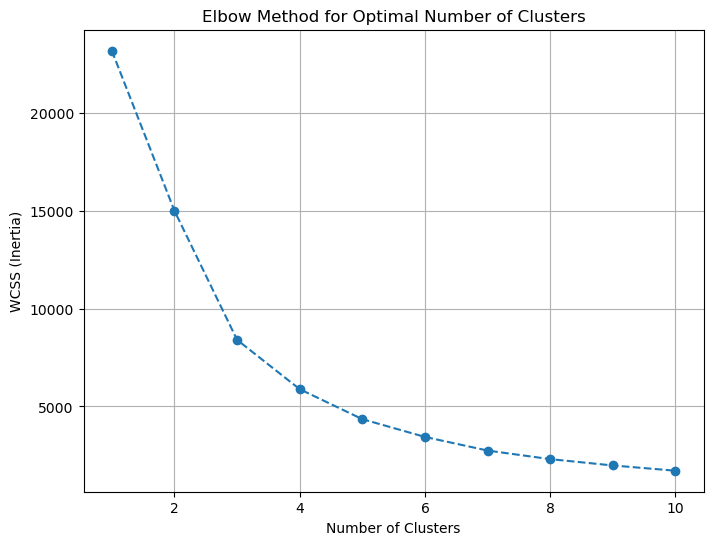

In [38]:
# Select the relevant features: YOM and Total Fatalities
features = cluster_df[['YOM', 'Total fatalities']]

# Standardize the data using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # Inertia measures how far the points in a cluster are from the center

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid()
plt.show()

The best number of clusters for a K-means clustering algorithm can be found using the Elbow Method. Finding the location on the graph where the reduction of inertia begins to noticeably slow down is the aim. The ideal number of clusters for your K-means clustering technique is indicated by this point. Four clusters may be the best option for organizing my data, as the curve seems to begin to bend then level out around k=4. This value strikes a fair compromise between the model's simplicity and the clusters' compactness. Thus, I determined that the ideal number of clusters for your K-means clustering is k=4 based on this graph.

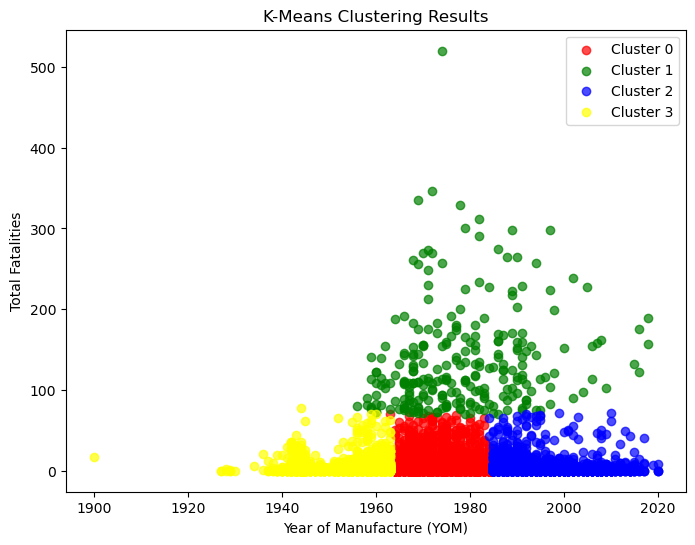

In [39]:
# Based on the elbow graph, select the optimal number of clusters
optimal_clusters = 4  # Adjust based on the elbow graph
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_features)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Define colors for each cluster
cluster_colors = ['red', 'green', 'blue', 'yellow']

# Add the cluster labels to the original dataset
cluster_df['KMeans_labels'] = kmeans.labels_

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
for i in range(optimal_clusters):
    plt.scatter(features['YOM'][labels == i], features['Total fatalities'][labels == i], label=f'Cluster {i}', c=cluster_colors[i], alpha=0.7)

plt.title('K-Means Clustering Results')
plt.xlabel('Year of Manufacture (YOM)')
plt.ylabel('Total Fatalities')
plt.legend()
plt.show()

1. Group 1: 1900 - 1965 Aircraft with Low to Medium Fatality. Notably, between 1930 and 1950, the number of fatalities was low. However, after 1950, the number of fatalities started to rise. The year 1965 was selected as the end point because it coincided with an improvement in aircraft manufacturing safety protocols, which reduced the number of fatalities during that period.
1. Group 2: 1965-1985 Aircraft with Medium Fatality. There was not a single period throughout this time when fatalities were continuously low, in contrast to Group 1. This implies that there were a medium number of fatalities because aircraft built in this era did not show the same level of safety advancements as those in Group 1.
1. Group 3: 1985-2020 Aircraft with Medium to Low Fatality. It suggests that the safety of the new aircraft developed during this time was still given top priority, which led to a decrease in accident fatalities.
1. Group 4: 1955-2020 Aircraft with Medium to High Fatality. The medium to high number of fatalities in these incidents is what distinguishes this group. It implies that there was a variety in the number of fatalities in accidents throughout this time period, which covered several decades, due to the aircraft's inconsistent safety record.

### Hierarchical Clustering

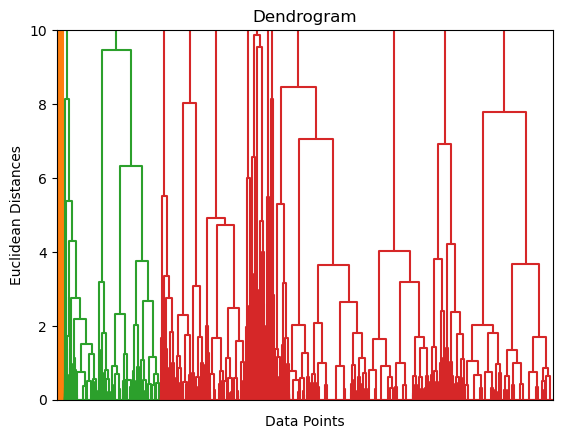

In [40]:
# Create a dendrogram to help determine the optimal number of clusters
dendrogram = dendrogram(linkage(scaled_features, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.ylim(0, 10)
plt.xticks([1])
plt.show()

Choosing the number of clusters in hierarchical clustering can be based on Interpretability. It may be simpler to understand and utilize three clusters than a higher number of clusters. It offers simplicity and granularity in equal measure.

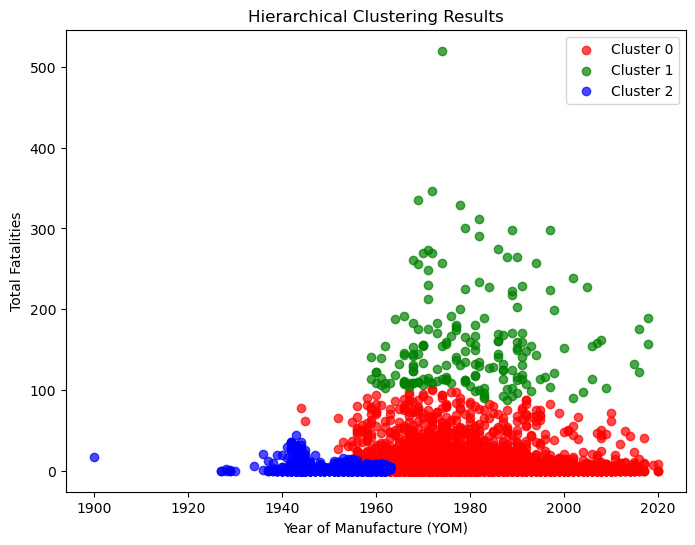

In [41]:
# Initialize the AgglomerativeClustering model
n_clusters = 3  # Adjust the number of clusters as needed
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model to your scaled data
cluster_labels = agglomerative.fit_predict(scaled_features)

# Define colors for each cluster
cluster_colors = ['red', 'green', 'blue']

# Add the cluster labels to your original dataset
cluster_df['HR_labels'] = agglomerative.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
for label in range(n_clusters):
    plt.scatter(
        features['YOM'][cluster_labels == label],
        features['Total fatalities'][cluster_labels == label],
        label=f'Cluster {label}',
        c=cluster_colors[label],
        alpha=0.7
    )

plt.title('Hierarchical Clustering Results')
plt.xlabel('Year of Manufacture (YOM)')
plt.ylabel('Total Fatalities')
plt.legend()
plt.show()

1. Low Fatality (Blue): The instances in this group of historical plane crashes had very few fatalities. These incidences took place between 1900 and 1965.
1. Medium Fatality (Red): The plane crash accidents in this group had a medium number of fatalities. . These incidents took place between 1965 and 2020.
1. High Fatality (Green): Incidents involving plane crashes that have a comparatively high number of fatalities fall under this category. These instances, which took place between 1950 and 2020, showed a recurrently greater death toll.

### DBSCAN (Density-Based Clustering)

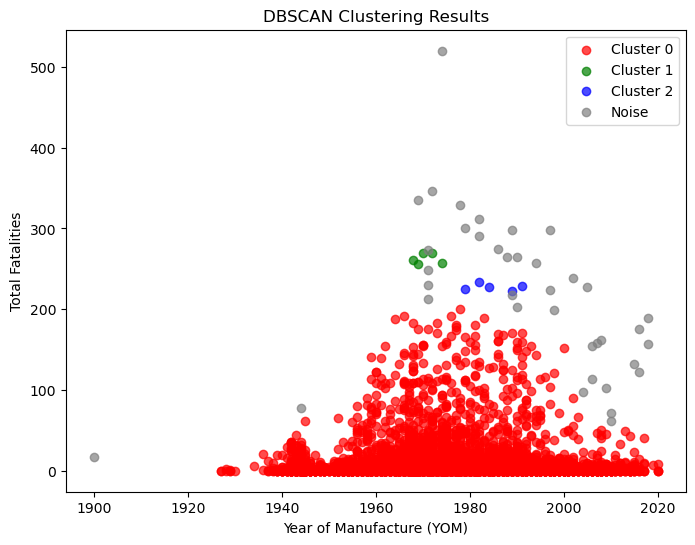

In [42]:
# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  

# Fit the DBSCAN model and obtain cluster labels
cluster_labels = dbscan.fit_predict(scaled_features)

# Define custom colors for clusters
colors = ['red', 'green', 'blue']  

# Create a colormap for cluster labels
cmap = plt.cm.get_cmap('rainbow', len(set(cluster_labels)))

# Add the cluster labels to the original dataset
cluster_df['DBSCAN_labels'] = cluster_labels

# Visualize the clusters using a scatter plot with custom colors and alpha
plt.figure(figsize=(8, 6))
unique_labels = set(cluster_labels)

for label in unique_labels:
    if label == -1:
        plt.scatter(cluster_df['YOM'][cluster_labels == label], cluster_df['Total fatalities'][cluster_labels == label], label='Noise', alpha=0.7, color='gray')
    else:
        cluster_color = colors[label % len(colors)]  
        plt.scatter(cluster_df['YOM'][cluster_labels == label], cluster_df['Total fatalities'][cluster_labels == label], label=f'Cluster {label}', color=cluster_color, alpha=0.7)

plt.title('DBSCAN Clustering Results')
plt.xlabel('Year of Manufacture (YOM)')
plt.ylabel('Total Fatalities')
plt.legend()
plt.show()


With eps=0.5 and min_samples=5, I am presumably searching for clusters with a relatively small radius (0.5 units), and for a cluster to be deemed significant, it must include at least 5 data points. It may require some experimentation to find the optimal parameters for your specific use case.

In [43]:
# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5) 

# Fit the DBSCAN model and obtain cluster labels
cluster_labels = dbscan.fit_predict(scaled_features)

# Create a NearestNeighbors model
n_neighbors = 5  
nn_model = NearestNeighbors(n_neighbors=n_neighbors)
nn_model.fit(scaled_features)

# Use kneighbors to find the distances and indices of the nearest neighbors
distances, indices = nn_model.kneighbors(scaled_features)

print(distances, indices)

[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.04345225 0.06894022]
 ...
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.04345225 0.04345225 0.04345225]] [[ 1657  1439  2044  1733  1649]
 [  661  3031  6068     1   799]
 [    2  3711   382  1840   348]
 ...
 [ 1508  2130  1740  1417  1734]
 [  135   197   176    12   185]
 [ 7190 11599  2976  7055  3138]]


I determined the k-distances for my data, plotted the k-distance graph, and located the knee point in order to choose the eps value that strikes a balance between your clustering goals and the properties of my data. I decided on n_neighbors=5. This method reduces the amount of noise in your images while still enabling you to capture significant clusters.

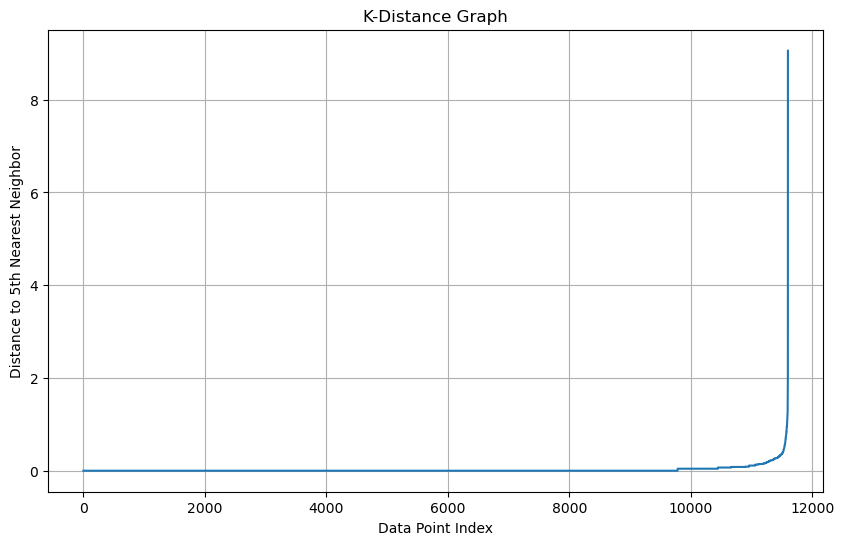

In [44]:
# Compute the distances to the k-nearest neighbors
nn_model = NearestNeighbors(n_neighbors=5) 
nn_model.fit(scaled_features)
distances, indices = nn_model.kneighbors(scaled_features)

# Sort the distances for each point
sorted_distances = np.sort(distances, axis=0)

# Plot the K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(list(range(1, len(sorted_distances) + 1)), sorted_distances[:, -1])
plt.title('K-Distance Graph')
plt.xlabel('Data Point Index')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.grid()
plt.show()

By selecting the knee point as the eps value, I can determine the distance at which data points can cluster together since they are reasonably close to one another. Data points may be regarded as noise if they are closer than this. Instead of depending only on intuition, the knee graph method allows you to choose a suitable eps value based on data. You're making an educated guess regarding the neighborhood size for density-based clustering in your data by selecting the knee point.

In [45]:
# Initialize a DBSCAN object with eps and min_samples parameters
eps_value = 0.4  
min_samples_value = 5 
dbscan_opt = DBSCAN(eps=eps_value, min_samples=min_samples_value)

# Fit the DBSCAN model on your dataset
dbscan_opt.fit_predict(scaled_features)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

The choice of k, eps, and min_samples often requires some trial and error, and it depends on the specific characteristics of your dataset. 

In [46]:
# Add the DBSCAN cluster labels as a new column in your DataFrame
cluster_df['DBSCAN_opt_labels'] = dbscan_opt.labels_

# Count the number of data points in each cluster
cluster_counts = cluster_df['DBSCAN_opt_labels'].value_counts()

# Display the count for each cluster
print(cluster_counts)

 0    11542
-1       58
Name: DBSCAN_opt_labels, dtype: int64


The radius in which DBSCAN searches for nearby data points is defined by epsilon. You selected an eps value of 0.4 in my instance. Accordingly, a data point must have at least min_samples_value (5) other data points within 0.4 units of it in order to be deemed a core point. Based on the properties of your dataset, the kind of clusters you hope to uncover, and your noise tolerance, these values (0.4 for eps and 5 for min_samples) were selected.

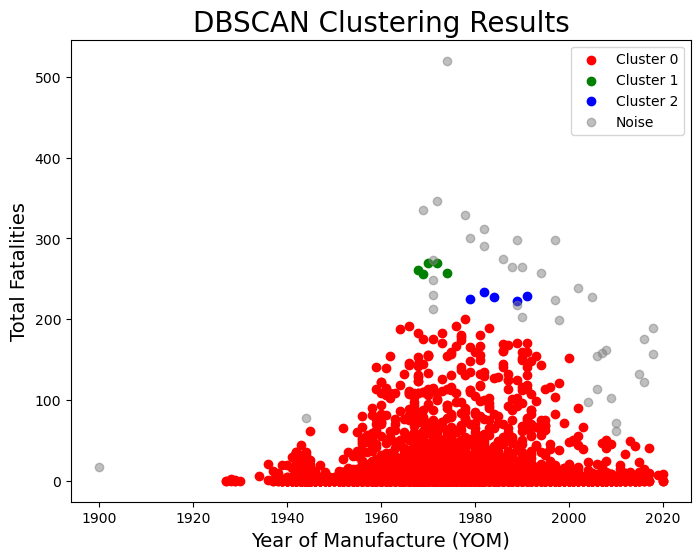

In [47]:
# Add the cluster labels to the original dataset
cluster_df['DBSCAN_opt_labels'] = cluster_labels

colors = ['red', 'green', 'blue', 'gray']

# Visualize the clusters using a scatter plot with custom colors
plt.figure(figsize=(8, 6))
unique_labels = set(cluster_labels)

for label in unique_labels:
    if label == -1:
        plt.scatter(cluster_df['YOM'][cluster_labels == label], cluster_df['Total fatalities'][cluster_labels == label], label='Noise', alpha=0.5, color='gray')
    else:
        cluster_color = colors[label % len(colors)]  # Use a custom color
        plt.scatter(cluster_df['YOM'][cluster_labels == label], cluster_df['Total fatalities'][cluster_labels == label], label=f'Cluster {label}', color=cluster_color)

plt.title('DBSCAN Clustering Results', fontsize=20)
plt.xlabel('Year of Manufacture (YOM)', fontsize=14)
plt.ylabel('Total Fatalities', fontsize=14)
plt.legend()
plt.show()

1. Group 1 (Red): represents a category of plane crash incidents with relatively low total fatalities, ranging from 0 to 200 (year 1930-2020). 
1. Group 2 (Blue): indicates plane crash incidents with total fatalities falling in the range of 200 to 250 (year 1980-1995).
1. Group 3 (Red): these incidents fall within a different range of total fatalities, specifically between 250 and 300 (year 1965-1975).
1. Noise: The "noise" category in DBSCAN is represented by the points that do not belong to any of the three colored clusters. Typically, noise points are solitary data points that don't meet the density requirements to be classified as a component of a cluster. They don't belong to any of the recognized clusters. These points are displayed separately and without any particular color in your graph.

In [48]:
silhouette_kmeans = silhouette_score(scaled_features, kmeans.labels_)
silhouette_dbscan = silhouette_score(scaled_features, dbscan_opt.labels_)
silhouette_hierarchical = silhouette_score(scaled_features, agglomerative.labels_)

print(f'Silhouette Score - K-Means: {silhouette_kmeans}')
print(f'Silhouette Score - DBSCAN: {silhouette_dbscan}')
print(f'Silhouette Score - Hierarchical: {silhouette_hierarchical}')

Silhouette Score - K-Means: 0.4948954860688911
Silhouette Score - DBSCAN: 0.8429955942299725
Silhouette Score - Hierarchical: 0.480802573264347


A higher score implies that the object is well matched to its own cluster and poorly matched to nearby clusters. The Silhouette Score is a number between -1 and 1. The best-performing algorithm seems to be DBSCAN, which is followed by K-Means and Hierarchical Clustering. DBSCAN is a viable option for my clustering work because it provides solid evidence of distinct and well-separated clusters.

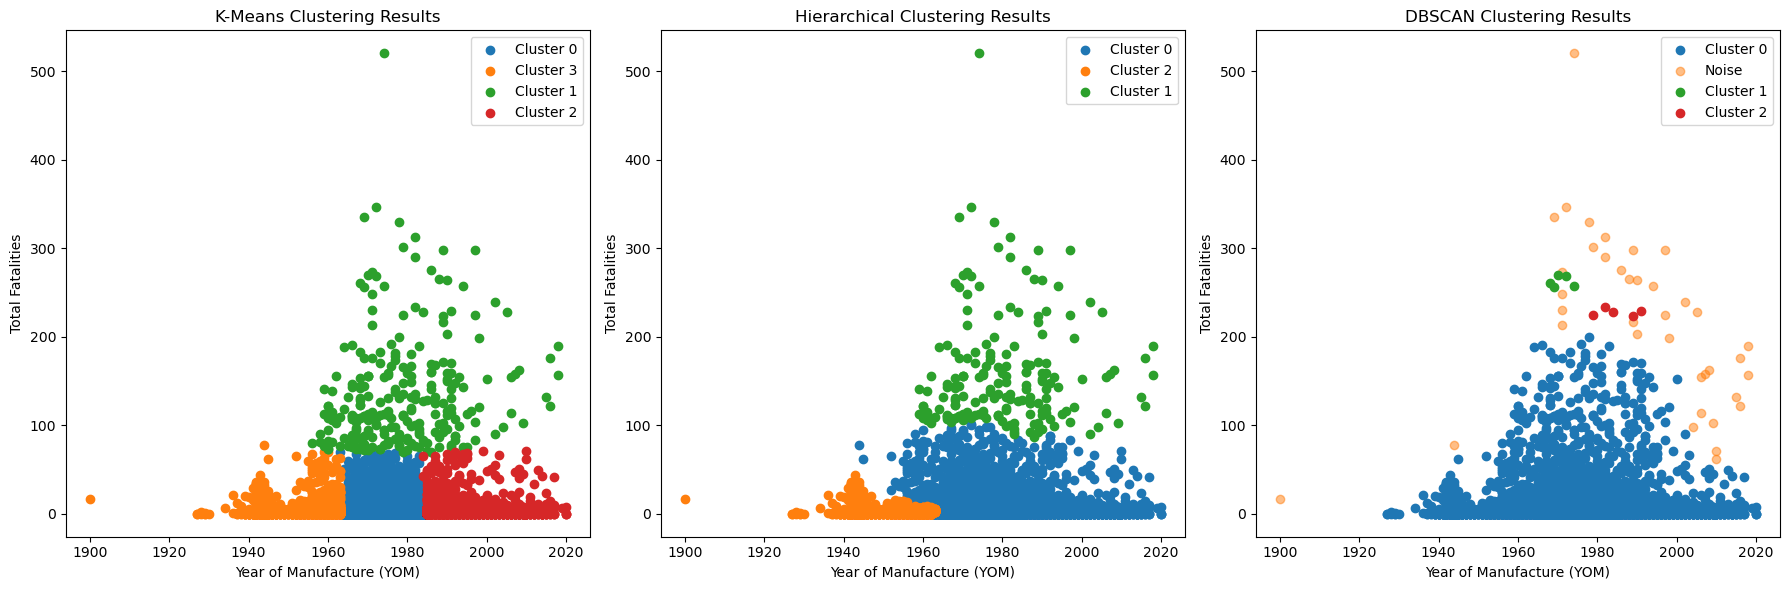

In [49]:
# Create a DataFrame containing the features and cluster labels from all three methods
df_clusters = pd.DataFrame({
    'YOM': features['YOM'],
    'Total Fatalities': features['Total fatalities'],
    'K-Means Cluster': cluster_df['KMeans_labels'],
    'Hierarchical Cluster': cluster_df['HR_labels'],
    'DBSCAN Cluster': cluster_df['DBSCAN_opt_labels']
})

# Create a figure with subplots
plt.figure(figsize=(18, 6))

# Plot K-Means clusters
plt.subplot(131)
for cluster_label in df_clusters['K-Means Cluster'].unique():
    plt.scatter(
        df_clusters[df_clusters['K-Means Cluster'] == cluster_label]['YOM'],
        df_clusters[df_clusters['K-Means Cluster'] == cluster_label]['Total Fatalities'],
        label=f'Cluster {cluster_label}'
    )
plt.title('K-Means Clustering Results')
plt.xlabel('Year of Manufacture (YOM)')
plt.ylabel('Total Fatalities')
plt.legend()

# Plot Hierarchical Clustering clusters
plt.subplot(132)
for cluster_label in df_clusters['Hierarchical Cluster'].unique():
    plt.scatter(
        df_clusters[df_clusters['Hierarchical Cluster'] == cluster_label]['YOM'],
        df_clusters[df_clusters['Hierarchical Cluster'] == cluster_label]['Total Fatalities'],
        label=f'Cluster {cluster_label}'
    )
plt.title('Hierarchical Clustering Results')
plt.xlabel('Year of Manufacture (YOM)')
plt.ylabel('Total Fatalities')
plt.legend()

# Plot DBSCAN clusters
plt.subplot(133)
for cluster_label in df_clusters['DBSCAN Cluster'].unique():
    if cluster_label != -1:  # Skip the noise points (-1)
        plt.scatter(
            df_clusters[df_clusters['DBSCAN Cluster'] == cluster_label]['YOM'],
            df_clusters[df_clusters['DBSCAN Cluster'] == cluster_label]['Total Fatalities'],
            label=f'Cluster {cluster_label}'
        )
    else:
        plt.scatter(
            df_clusters[df_clusters['DBSCAN Cluster'] == cluster_label]['YOM'],
            df_clusters[df_clusters['DBSCAN Cluster'] == cluster_label]['Total Fatalities'],
            label='Noise',
            alpha=0.5
        )
plt.title('DBSCAN Clustering Results')
plt.xlabel('Year of Manufacture (YOM)')
plt.ylabel('Total Fatalities')
plt.legend()

plt.tight_layout()
plt.show()

1. K-Means Clustering - The K-Means method, which groups similar episodes together, identified the boundaries separating these clusters (Based on the elbow graph).
1. Hierarchical Clustering - Similar to K-Means, Hierarchical Clustering identifies clusters based on the similarities between incidents, but it follows a hierarchical structure (dendrogram helped to determine the optimal number of clusters).
1. DBSCAN Clustering - Calculated the k-distance; Sorted the k-distances; Plotted the k-distance graph; Identified the "knee"  point and chose eps. DBSCAN appears to identify well-separated clusters with the fewest outliers.

### Prediction

In [50]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11600 entries, 1972-05-01 to 2022-05-29
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  11600 non-null  datetime64[ns]
 1   Aircraft              11600 non-null  object        
 2   Operator              11600 non-null  object        
 3   Flight phase          11600 non-null  object        
 4   Flight type           11600 non-null  object        
 5   Survivors             11600 non-null  object        
 6   Crash site            11600 non-null  object        
 7   YOM                   11600 non-null  Int64         
 8   Crash location        11600 non-null  object        
 9   Country               11600 non-null  object        
 10  Region                11600 non-null  object        
 11  Crew on board         11600 non-null  Int64         
 12  Crew fatalities       11600 non-null  Int64         
 13 

In [51]:
# This removes the 3 attributes mentioned above
cluster_df2 = cluster_df.drop(columns=['Circumstances', 'Survivors', 'Flight phase', 'Date', 'DBSCAN_labels'])

In [52]:
# List of features to one-hot encode
categorical_features = ['Aircraft', 'Operator', 'Flight type',
                       'Crash site', 'Crash location', 'Region', 'Country', 'Crash cause',]

# Apply one-hot encoding
df_encoded = pd.get_dummies(cluster_df2, columns=categorical_features)

In [53]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11600 entries, 1972-05-01 to 2022-05-29
Columns: 14327 entries, YOM to Crash cause_Weather
dtypes: Int64(8), int32(2), int64(2), uint8(14315)
memory usage: 159.5 MB


In [54]:
def classification_all_features(Model):
    
    # Separate response variable and features
    X = df_encoded.drop('Survivors_encoded', axis = 1)
    y = df_encoded['Survivors_encoded']
    
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    
    # Feature Scaling
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    
    global score
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))
  
    # Printing accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    # Making the Confusion Matrix
    print(confusion_matrix(y_test, y_pred))

### Decision Tree

In [55]:
# Function for decision tree classification model with all features
classification_all_features(DecisionTreeClassifier(criterion = 'gini', random_state = 0))

f1 score: 0.955831511203634
Accuracy: 0.9557471264367816
[[1436   52]
 [ 102 1890]]


In [56]:
dtr1 = score
dt1 = 0.95

### Random Forest

In [57]:
# Function for Random Forest Classification model with all features
classification_all_features(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))

f1 score: 0.9047952425222466
Accuracy: 0.9043103448275862
[[1422   66]
 [ 267 1725]]


In [58]:
rfc1 = score
rf1 = 0.90

### KNN

In [59]:
# Function for K-NN classification with all features
classification_all_features(KNeighborsClassifier())

f1 score: 0.5239759201987704
Accuracy: 0.5660919540229885
[[ 340 1148]
 [ 362 1630]]


In [60]:
knn1 = score
kn1 = 0.56

### Logistic Regression

In [61]:
# Function for logistic regression with all features
classification_all_features(LogisticRegression(random_state = 0))

f1 score: 0.7424056161424444
Accuracy: 0.742816091954023
[[1023  465]
 [ 430 1562]]


In [62]:
lrg1 = score
lr1 = 0.74

### Support Vector Machine(SVM)

In [63]:
# Function for SVM classifier with all features
classification_all_features(SVC(kernel = 'linear', random_state = 0))

f1 score: 0.7544751196663299
Accuracy: 0.7554597701149425
[[1022  466]
 [ 385 1607]]


In [64]:
svm1 = score
sv1 = 0.75

### Evaluation

### Comparing F1 scores

In [65]:
# Dictionary of model f1 scores to compare
results={'Logistic Regression': [lrg1], 
         'Decision Tree': [dtr1], 
         'Random Forest': [rfc1], 
         'KNN': [knn1], 
         'SVM': [svm1]} 

In [66]:
# Creating model comparison dataframe
comparison = pd.DataFrame.from_dict(results, orient='index')
comparison.columns = ['all_features']

In [71]:
# Models Compare List
comparison

,all_features
Logistic Regression,0.742406
Decision Tree,0.955832
Random Forest,0.904795
KNN,0.523976
SVM,0.754475


These F1 ratings help me to select the best model for my project by revealing information about how well the models can classify occurrences. With the greatest F1 score in this instance, the Decision Tree model excels in identifying the historical data on plane crashes.

### Comparing Accuracies

In [67]:
# Dictionary of model accuracies to compare
results2={'Logistic Regression': [lr1], 
         'Decision Tree': [dt1], 
         'Random Forest': [rf1], 
         'KNN': [kn1], 
         'SVM': [sv1]} 

In [68]:
# Creating model comparison dataframe
comparison2 = pd.DataFrame.from_dict(results2, orient='index')
comparison2.columns = ['all_features']

In [70]:
# Models Compare List
comparison2

,all_features
Logistic Regression,0.74
Decision Tree,0.95
Random Forest,0.90
KNN,0.56
SVM,0.75


## Conclusion

<p>In coclusion, using time series, cluster analysis, and data preprocessing, we were able to extract significant insights from our study of historical plane crash data spanning more than a century. We started our project with careful data processing, where we fixed missing data, transformed category variables into numerical representations, and narrowed the dataset to only include information from the previous 50 years. The result of their efforts was a preprocessed dataset with 20 attributes and 11,686 observations.</p>
<p>We moved our attention to time series analysis and started investigating crash incidents in detail over time. After noticing a negative trend in the data from the first visualization, we looked into the data's stationarity. Applying to difference and the Dicky Fuller Test allowed us to effectively convert the non-stationary data into a stationary format. Time series modeling became possible with this change in approach.</p>
<p>Our selection of time series models was guided by the discovery of an Autoregressive (AR) process through in-depth analysis of auto-correlation and partial auto-correlation. Starting with baseline models, the naive forecast model fared better than the other options, suggesting that seasonality might exist.</p>
<p>We attempted more intricate models in order to solve this seasonality. Automation techniques such as auto_arima and a nested loop were used in the construction and tuning of the ARIMA, SARIMA, SARIMAX, and TBATS models. With the Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend, and Seasonal Model (TBATS), our efforts produced a promising outcome with a low Mean Absolute Percentage Error (MAPE) of 34.15%.</p>
<p>The best-performing algorithm was DBSCAN, which was followed by K-Means and Hierarchical Clustering. DBSCAN was a viable option for my clustering work because it provided solid evidence of distinct and well-separated clusters.</p>
<p>The possibility to forecast and comprehend patterns in past plane crash data was made evident by our thorough investigation into data processing, clustering and time series analysis. Future analysis and improved decision-making are made possible by the effective use of sophisticated time series modeling, which provides access to more precise forecasts.</p>

## References

1. MacQueen, J. B. (1967). Some methods for classification and analysis of multivariate observations. In Proceedings of the Fifth Berkeley Symposium on Mathematical Statistics and Probability (Vol. 1, No. 14, pp. 281-297). University of California Press.
1. Schaeffer, S. E. (2007). Graph clustering. Computer Science Review, 1(1), 27-64.
1. Jain, A. K., Murty, M. N., & Flynn, P. J. (1999). Data clustering: a review. ACM computing surveys (CSUR), 31(3), 264-323.

# Visualization: Percentage of Efforts by Group Members

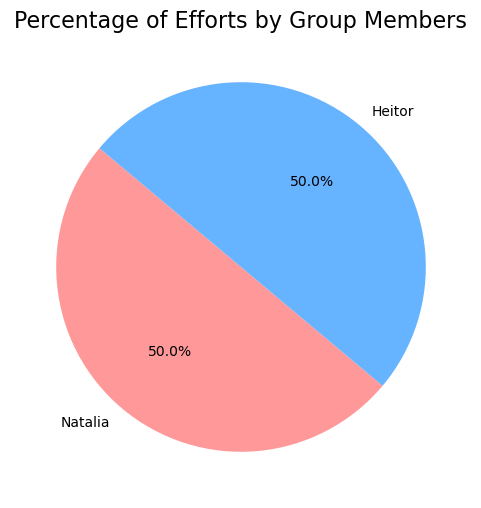

In [72]:
names = ['Natalia', 'Heitor']
efforts = [50, 50]

plt.figure(figsize=(6, 6))
plt.pie(efforts, labels=names, autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
plt.title('Percentage of Efforts by Group Members', fontsize=16)
plt.show()